Kelompok : 1
Topik: #sbmptn
Anggota:
1. 5200411482 - Muhammad Aulia--> Ketua Kelompok
2. 5200411379 - Cahyo Prakoso
3. 5200411483 - Muhammad Rousydi Hunafa
4. 5200411490 - Ilham Rafiedhia Pramutighna


Motivasi kami menggunakan tema sbmptn karena setiap tahunnya topik ini selalu menjadi perbincangan dan menyita banyak perhatian para pelajar di Indonesia. Kemudian jika dikaitkan dengan media sosial, topik ini juga mendominasi banyak dibahas di kalangan twitter Indonesia. Maka dari ini dengan memanfaatkan momen tersebut kita bisa mengambil respon atau tanggapan dari para pengguna twitter mengenai sudut pandang mereka tentang topik sbmptn di Indonesia. Kemudian dari data yang kita perolah akan dilakukan proses analisis sentimen, dari hasil analisis tersebut menghasilkan 3 parameter, diantaranya ada emosi positif, negatif, dan netral.


# A. Crawling Data

#### A.1 Install Library Tweepy

In [ ]:
!pip install git+https://github.com/tweepy/tweepy.git

#### A.2 Menyambungkan Token API Twitter

In [ ]:
import tweepy
import datetime
import pandas as pd

api_key = "RSfnfqaIh8I3ep3fTnHqCzGRo"
api_secret = "OUxYg7QHqvLjhc7eQUZ7IAiYSKphjBoLC50vZdvXCsTk2IncIx"
access_token = "1470788635255468033-ZYbfDQ3zHa8CSGUkDKpFLagYn98pkX"
access_secret = "SpC7cnOybf9giO2ElEqIQ3pEs2ch7uCDNmQTR7e14w0sq"

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentikasi Berhasil")
except:
    print("Authentikasi Gagal")

Authentikasi Berhasil


#### A.3 Menentukan keyword "sbmptn" dan Jumlah Data

In [ ]:
tweets_list = tweepy.Cursor(api.search_tweets, q="sbmptn" ,tweet_mode='extended', lang='id').items(1000)

#### A.4 Proses Crawling Data Twitter

In [ ]:
output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]   
    line = {'text' : text}
    output.append(line)

In [ ]:
df = pd.DataFrame(output)
df2 = df.copy()
df2

,text
0,"""SELAMAT! ANDA DINYATAKAN LULUS SELEKSI SBMPTN..."
1,RT @an_muty: @eugeneofc_ @stunninshine Mjb ini...
2,RT @sbmptnfess: PTN! Semoga kita semua lolos s...
3,Semoga laila lulus sbmptn 2022 pilihan pertama...
4,Gapyear! Berharap banget Utul UGM masih buka s...
...,...
995,RT @DaffaVonPolo: Allahuma Sholli’ala Sayyidin...
996,@tripnababy @swinpi semoga kamu yang sponsor l...
997,@tripnababy @swinpi semoga sponsor lolos sbmpt...
998,RT @AESPAINAUNION: Coba tebak #aespa pindah da...


#### A.5 Preprocessing Awal

In [ ]:
import re

def clean(str_text):
    str_text = str_text.lower()
    str_text = re.sub(r'@[\w]+', ' ', str_text)
    str_text = re.sub(r'#[\w]+', ' ', str_text)
    str_text = re.sub(r'http\S+', ' ', str_text)
    str_text = re.sub(r'[^a-zA-Z]+', ' ', str_text)
    str_text = str_text.replace('rt ', '')
    return str_text

df2['text'] = df2['text'].apply(lambda x: clean(x))

Mengahapus Duplicate Data

In [ ]:
df2.drop_duplicates(keep=False,inplace=True)

In [ ]:
df2

,text
0,selamat anda dinyatakan lulus seleksi sbmptn
1,mjb ini ya link nyaa
2,ptn semoga kita semua lolos sbmptn aamiin
3,semoga laila lulus sbmptn pilihan pertama aamiin
4,gapyear berharap banget utul ugm masih buka se...
...,...
986,aamiin tapi ntar kalau lulus sbmptn aku ngisi...
994,nggak dikasih apa apa karna lolos sbmptn adal...
996,semoga kamu yang sponsor lolos sbmptn jalur m...
997,semoga sponsor lolos sbmptn dan jalur mandiri...


#### A.6 Import ke CSV

In [ ]:
df2.to_csv('sbmptn.csv')

# B. Preprocessing

###### B1. Load Data Baru

In [63]:
import pandas as pd

df = pd.read_csv('sbmptn_sentiment.csv')
df.head()

,text,sentiment
0,ptn semoga yang retweet dan like lolos sbmptn,positif
1,soal tps pengetahuan dan pemahaman umum ppu ut...,netral
2,soal tka utbk sbmptn sosiologi pembahasannya m...,netral
3,mau bayar ukt atau pendaftaran kuliah tapi gak...,netral
4,allahuma sholli ala sayyidina muhammad wa ala ...,positif


###### B2. Normalisasi

In [64]:
norm = {" pgn ":" ingin ", " gue ":" saya ", " dgn ":"dengan ", "bgmn ":" bagaimana ", " ga ":" tidak ", 
        " gak ":" tidak ", " dr ":" dari ", " yg ":" yang ", " lu ":" kamu ", " sya ":" saya ", 
        " lancarrr ":" lancar ", " kayak ":" seperti ", " ngawur ":" sembarangan ", " k ":" ke ", 
        " luasss ":" luas ", " sy ":" saya ", " thn ":" tahun ", " males ":" malas ", 
        " tgl ":" tanggal ", " lg ":" lagi ", " bgt ":" banget ",' gua ':' saya ', ' univ ': ' universitas '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text
df['text'] = df['text'].apply(lambda x: normalisasi(x))

###### B3. Normalisasi

In [30]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ['utbk', 'sbmptn', 'lolos', 'alhamdulillah', 'allahuma', 'amin',
                   'semoga', 'bismillah', 'semangat', 'universitas', 'ptn', 'pasrah',
                   'nyerah', 'lulus', 'selamat', 'malas']

stop_words = StopWordRemoverFactory().get_stop_words()
new_stop_words = stop_words + more_stop_words
new_array = ArrayDictionary(new_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['text'] = df['text'].apply(lambda x: stopword(x))
df.head()

,text,sentiment
0,semoga retweet like sbmptn,positif
1,soal tps pengetahuan pemahaman umum ppu sbmptn...,netral
2,soal tka sbmptn sosiologi pembahasannya menyus...,netral
3,mau bayar ukt pendaftaran kuliah tidak rekenin...,netral
4,sholli ala sayyidina muhammad wa ala ali sayyi...,positif


##### B4. Tokenize

In [66]:
tokenized_tweet = df['text'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0                      [semoga, retweet, like, sbmptn]
1    [soal, tps, pengetahuan, pemahaman, umum, ppu,...
2    [soal, tka, sbmptn, sosiologi, pembahasannya, ...
3    [mau, bayar, ukt, pendaftaran, kuliah, tidak, ...
4    [sholli, ala, sayyidina, muhammad, wa, ala, al...
Name: text, dtype: object

##### B5. Stemming

In [67]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

##### B6. Recombine word

In [68]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
df['text'] = tokenized_tweet
df.head()

,text,sentiment
0,moga retweet like sbmptn,positif
1,soal tps tahu paham umum ppu sbmptn bahas beso...,netral
2,soal tka sbmptn sosiologi bahas susul sekarang...,netral
3,mau bayar ukt daftar kuliah tidak rekening ban...,netral
4,sholli ala sayyidina muhammad wa ala ali sayyi...,positif


# C Visualisasi

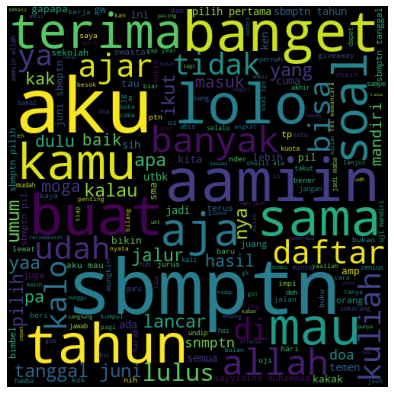

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in df['text']]) 
wordcloud = WordCloud(width=500,height=500,random_state=21,max_font_size=100).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# D. Klasifikasi

##### D1. Split Data training dan testing

In [36]:
from sklearn.model_selection import train_test_split

feature = df['text']
target = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=123)

##### D2. Vectorizer dengan CountVectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vec_model = CountVectorizer().fit(X_train)
vec_data = vec_model.transform(X_train)

##### D3. Apply model naive bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB

cls_model_mnb = MultinomialNB().fit(vec_data, y_train)
cls_model_mnb.score(vec_data, y_train)

0.9217687074829932

##### D4. Hasil akurasi testing

In [39]:
test_data = vec_model.transform(X_test)
cls_model_mnb.score(test_data, y_test)

0.7007874015748031

##### D5. Confusion matrix

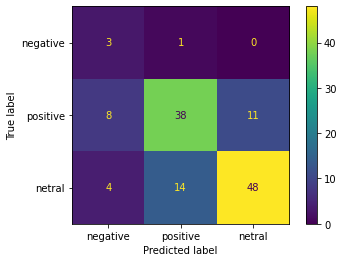

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = cls_model_mnb.predict(test_data)
cm = confusion_matrix(pred, y_test)
ConfusionMatrixDisplay(cm, display_labels=['negative', 'positive', 'netral']).plot()

# E. Prediction

In [59]:
text = ['lolos sbmptn','daftar kuliah', 'gap year gagal']
df_pred = pd.DataFrame(text, columns=["text"])

# prediksi/klasifikasi
df_pred["Sentiment"] = cls_model_mnb.predict(vec_model.transform(df_pred['text']))
df_pred

,text,Sentiment
0,lolos sbmptn,positif
1,daftar kuliah,netral
2,gap year gagal,netral


#F. Ide dan Saran



*   Dengan Menambahkan kamus pada stopword memiliki pengaruh terhadap analisis karena data yang kami ambil memiliki banyak istilah kata yang tidak ada pada stopword Sastrawi
*   Penggunaan Data yang cukup besar dapat membantu proses prediksi akurat pada data baru
*   Analisis ini dapat digunakan untuk keperluan promosi lembaga kursus ataupun universitas swasta



